### Generating Plots for Paper

In [18]:
#usual procedure...
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from nuflux import detgeo as dg
import pandas as pd
import gc
import pickle
import matplotlib.ticker as ticker

from nuflux import plot_tools as pt

light_factor = 0.5
LW=1.25


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import os
directory = 'plots'
os.path.join(os.getcwd(), directory)

'/Users/mhostert/Repos/BIN_MC-1/plots'

In [4]:
Nevents = 1e6
# DIREC = 'GENANA'
DIREC = None
# version = 'old_Aug6/'
version = ''
data1 = dg.load_data(f'{version}mucols2numu.txt', n_events = Nevents, direc = DIREC) #this is my variable for the directory in which my .txt files are.
data2 = dg.load_data(f'{version}mucols2nue.txt', n_events = Nevents, direc = DIREC)
data = pd.concat([data1, data2], axis = 0)
data11 = dg.load_data(f'{version}mokhovnumu.txt', n_events = Nevents, direc = DIREC) #this is my variable for the directory in which my .txt files are.
data21 = dg.load_data(f'{version}mokhovnue.txt', n_events = Nevents, direc = DIREC)
datam = pd.concat([data11, data21], axis = 0)
datat = dg.load_data(f'{version}muTs.txt', n_events = Nevents, direc = DIREC) 

Loading generated data for a IMCC-II experiment;
It includes interactions from ν_μ, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.


/Users/mhostert/Repos/BIN_MC-1/nuflux/detgeo.py:1452: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filename, delim_whitespace=True, skiprows=5)


Adding weights...
Done!
Loading generated data for a IMCC-II experiment;
It includes interactions from ν_e, anti ν_e within the MD, SB, SM, HC, EC, NO of the muon detector.


/Users/mhostert/Repos/BIN_MC-1/nuflux/detgeo.py:1452: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filename, delim_whitespace=True, skiprows=5)


Adding weights...
Done!
Loading generated data for a Mohkov et al. (Fermilab) experiment;
It includes interactions from ν_μ, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.


/Users/mhostert/Repos/BIN_MC-1/nuflux/detgeo.py:1452: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filename, delim_whitespace=True, skiprows=5)


Adding weights...
Done!
Loading generated data for a Mohkov et al. (Fermilab) experiment;
It includes interactions from ν_e, anti ν_e within the MD, SB, SM, HC, EC, NO of the muon detector.


/Users/mhostert/Repos/BIN_MC-1/nuflux/detgeo.py:1452: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filename, delim_whitespace=True, skiprows=5)


Adding weights...
Done!
Loading generated data for a μTRISTAN (s) experiment;
It includes interactions from ν_e, anti ν_μ within the MD, SB, SM, HC, EC, NO of the muon detector.


/Users/mhostert/Repos/BIN_MC-1/nuflux/detgeo.py:1452: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(filename, delim_whitespace=True, skiprows=5)


Adding weights...
Done!


In [5]:
mus_mucol = (data[(data['Name'] == 'mu+') | (data['Name'] == 'mu-')])
es_mucol = (data[(data['Name'] == 'e-') | (data['Name'] == 'e+')])
nus_mucol = {}
nus_mucol['Enue'] = data[(data['Name'] == 'e+') | (data['Name'] == 'e-')]['nu_E']
nus_mucol['wnue'] = data[(data['Name'] == 'e+') | (data['Name'] == 'e-')]['w']
nus_mucol['Enumu'] = data[(data['Name'] == 'mu+') | (data['Name'] == 'mu-')]['nu_E']
nus_mucol['wnumu'] = data[(data['Name'] == 'mu+') | (data['Name'] == 'mu-')]['w']
nus_mucol['E'] = data['nu_E']
nus_mucol['w'] = data['w']

mus_mokhov = (datam[(datam['Name'] == 'mu+') | (datam['Name'] == 'mu-')])
es_mokhov = (datam[(datam['Name'] == 'e-') | (datam['Name'] == 'e+')])
nus_mokhov = {}
nus_mokhov['Enue'] = (datam[(datam['Name'] == 'e+') | (datam['Name'] == 'e-')])['nu_E']
nus_mokhov['wnue'] = (datam[(datam['Name'] == 'e+') | (datam['Name'] == 'e-')])['w']
nus_mokhov['Enumu'] = (datam[(datam['Name'] == 'mu+') | (datam['Name'] == 'mu-')])['nu_E']
nus_mokhov['wnumu'] = (datam[(datam['Name'] == 'mu+') | (datam['Name'] == 'mu-')])['w']
nus_mokhov['E'] = datam['nu_E']
nus_mokhov['w'] = datam['w']

mus_muT = (datat[(datat['Name'] == 'mu+') | (datat['Name'] == 'mu-')])
es_muT = (datat[(datat['Name'] == 'e-') | (datat['Name'] == 'e+')])
nus_muT = {}
nus_muT['Enue'] = (datat[(datat['Name'] == 'e+') | (datat['Name'] == 'e-')])['nu_E']
nus_muT['wnue'] = (datat[(datat['Name'] == 'e+') | (datat['Name'] == 'e-')])['w']
nus_muT['Enumu'] = (datat[(datat['Name'] == 'mu+') | (datat['Name'] == 'mu-')])['nu_E']
nus_muT['wnumu'] = (datat[(datat['Name'] == 'mu+') | (datat['Name'] == 'mu-')])['w']
nus_muT['E'] = datat['nu_E']
nus_muT['w'] = datat['w']

In [6]:
dfs = [mus_mucol, es_mucol, mus_mokhov, es_mokhov, mus_muT, es_muT]
theta = [None, None, None, None, None, None]
pT = [None, None, None, None, None, None]
for i,el in enumerate(dfs):
    theta[i] = np.arccos(el['pz'] / np.sqrt(el['px']**2 + el['py']**2 + el['pz']**2)) * 180/np.pi
    pT[i] = np.sqrt(el['py']**2 + el['px']**2)   

In [7]:
version = 'test_MH'

with open(f'gen_data/muTs_{version}.pkl', 'rb') as file:
    muTs = pickle.load(file)
with open(f'gen_data/mucols2_{version}.pkl', 'rb') as file:
    mucol = pickle.load(file)
with open(f'gen_data/mokhov_{version}.pkl', 'rb') as file:
    mokhov = pickle.load(file)

with open(f'gen_data/muTs_sim_{version}.pkl', 'rb') as file:
    sim_muTs = pickle.load(file)
with open(f'gen_data/mucols2_sim_{version}.pkl', 'rb') as file:
    sim_mucol = pickle.load(file)
with open(f'gen_data/mokhov_sim_{version}.pkl', 'rb') as file:
    sim_mokhov = pickle.load(file)

In [8]:
_,_,_,w_muTs,times_muTs,E_muTs,cost_muTs = muTs.get_data()
_,_,_,w_mucol,times_mucol,E_mucol,cost_mucol = mucol.get_data()
_,_,_,w_mokhov,times_mokhov,E_mokhov,cost_mokhov = mokhov.get_data()
pT_muTs = E_muTs * np.sqrt(1 - cost_muTs**2)
pT_mokhov = E_mokhov * np.sqrt(1 - cost_mokhov**2)
pT_mucol = E_mucol * np.sqrt(1 - cost_mucol**2)
_, _, _, wms, timesms, _, _ = mucol.get_data(sec = 'muon_detector')
_, _, _, wno, timesno, _, _ = mucol.get_data(sec = 'nozzles')
_, _, _, whc, timeshc, _, _ = mucol.get_data(sec = 'hcal')
_, _, _, wec, timesec, _, _ = mucol.get_data(sec = 'ecal')

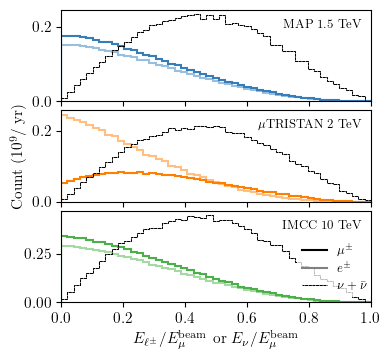

In [11]:
import matplotlib.gridspec as gridspec

# Create figure and gridspec
fig = plt.figure(figsize=(4.0, 3.8))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.1)
# ax1.set_title(r'Primary lepton energy spectrum')
LS = (1,(3,0.5))
LW = 1.5
yunits=1e9
# bins = np.logspace(np.log10(0.1), np.log10(10000), 100)
bins = np.linspace(0,1,50)
Emu_mutristan = 2e3/2
Emu_mokhov = 1.5e3/2
Emu_mucols2 = 10e3/2

# First subplot
ax1 = plt.subplot(gs[0])
ax1.hist(mus_mokhov['E'] / Emu_mokhov, weights=mus_mokhov['w'] / yunits,
         bins=bins, histtype='step', label='MAP 1.5 TeV', color=pt.cblind_safe_wheel[0], zorder=2, lw=LW)
ax1.hist(es_mokhov['E'] / Emu_mokhov, weights=es_mokhov['w'] / yunits,
         bins=bins, histtype='step', color=pt.lighten_color(pt.cblind_safe_wheel[0],light_factor), zorder=2-0.1, lw=LW)
# ax1.hist(nus_mokhov['Enumu'] / Emu_mokhov, weights=nus_mokhov['wnumu'] / yunits,
#          bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)
# ax1.hist(nus_mokhov['Enue'] / Emu_mokhov, weights=nus_mokhov['wnue'] / yunits,
#          bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)
ax1.hist(nus_mokhov['E'] / Emu_mokhov, weights=nus_mokhov['w'] / yunits,
         bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)

# Second subplot
ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.hist(mus_muT['E'] / Emu_mutristan, weights=mus_muT['w'] / yunits,
         bins=bins, histtype='step', label=r'$\mu$TRISTAN 2 TeV', color=pt.cblind_safe_wheel[1], zorder=2, lw=LW)
ax2.hist(es_muT['E'] / Emu_mutristan, weights=es_muT['w'] / yunits,
         bins=bins, histtype='step', color=pt.lighten_color(pt.cblind_safe_wheel[1],light_factor), zorder=2-0.1, lw=LW)
# ax2.hist(nus_muT['Enumu'] / Emu_mutristan, weights=nus_muT['wnumu'] / yunits,
#          bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)
# ax2.hist(nus_muT['Enue'] / Emu_mutristan, weights=nus_muT['wnue'] / yunits,
#          bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)
ax2.hist(nus_muT['E'] / Emu_mutristan, weights=nus_muT['w'] / yunits,
         bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)

# Third subplot
ax3 = plt.subplot(gs[2], sharex=ax1)
ax3.hist(mus_mucol['E'] / Emu_mucols2, weights=mus_mucol['w'] / yunits,
         bins=bins, histtype='step', label='IMCC 10 TeV', color=pt.cblind_safe_wheel[2], zorder=2, lw=LW)
ax3.hist(es_mucol['E'] / Emu_mucols2, weights=es_mucol['w'] / yunits,
         bins=bins, histtype='step', color=pt.lighten_color(pt.cblind_safe_wheel[2],light_factor), zorder=2-0.1, lw=LW)
# ax3.hist(nus_mucol['Enumu'] / Emu_mucols2, weights=nus_mucol['wnumu'] / yunits,
#          bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)
# ax3.hist(nus_mucol['Enue'] / Emu_mucols2, weights=nus_mucol['wnue'] / yunits,
#          bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)
ax3.hist(nus_mucol['E'] / Emu_mucols2, weights=nus_mucol['w'] / yunits,
         bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)


# ax1.hist(sim_mokhov.cco.pnumu[:,0]/Emu_mokhov, weights = sim_mokhov.cco.weights/sim_mokhov.cco.weights.sum()/(bins[1]-bins[0]), bins = bins, histtype = 'step', label = 'Mokhov 1.5 TeV', color = pt.cblind_safe_wheel[0], zorder = 2, lw=LW, ls=LS)
# ax1.hist(sim_mokhov.cco.pnue[:,0]/Emu_mokhov, weights = sim_mokhov.cco.weights/sim_mokhov.cco.weights.sum()/(bins[1]-bins[0]), bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[0],light_factor), zorder = 2, lw=LW, ls=LS)

# ax2.hist(sim_muTs.cco.pnumu[:,0]/Emu_mutristan, weights = sim_muTs.cco.weights/sim_muTs.cco.weights.sum()/(bins[1]-bins[0]), bins = bins, histtype = 'step', label = '$\mu$TRISTAN 2 TeV', color = pt.cblind_safe_wheel[1], zorder = 2, lw=LW, ls=LS)
# ax2.hist(sim_muTs.cco.pnue[:,0]/Emu_mutristan, weights = sim_muTs.cco.weights/sim_muTs.cco.weights.sum()/(bins[1]-bins[0]), bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[1],light_factor), zorder = 2, lw=LW, ls=LS)

# ax3.hist(sim_mucol.cco.pnumu[:,0]/Emu_mucols2, weights = sim_mucol.cco.weights/sim_mucol.cco.weights.sum()/(bins[1]-bins[0]), bins = bins, histtype = 'step', label = 'IMCC-II 10 TeV', color = pt.cblind_safe_wheel[2], zorder = 2, lw=LW, ls=LS)
# ax3.hist(sim_mucol.cco.pnue[:,0]/Emu_mucols2, weights = sim_mucol.cco.weights/sim_mucol.cco.weights.sum()/(bins[1]-bins[0]), bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[2],light_factor), zorder = 2, lw=LW, ls=LS)


ax2.set_ylabel(r'Count ($10^{9}$/ yr)')
ax3.set_xlabel(r'${E_{\ell^\pm}}/{E_\mu^{\rm beam}}$ or ${E_{\nu}}/{E_\mu^{\rm beam}}$')

# Loop over axes and annotate
labels=[r'MAP 1.5 TeV', r'$\mu$TRISTAN 2 TeV', r'IMCC 10 TeV']
for i, ax in enumerate([ax1, ax2, ax3]):
    ax.text(0.97, 0.9, labels[i], transform=ax.transAxes,
            fontsize=9, verticalalignment='top', horizontalalignment='right')
    # ax.set_ylim(0.,0.3)

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\mu^\pm$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$e^\pm$')
lighter_line = plt.Line2D([], [], color='black', zorder=2, lw=LW*0.5, ls=LS, label=r'$\nu+\bar\nu$')
leg2 = ax3.legend(handles=[dark_line, light_line, lighter_line], loc=(0.76, 0.06), title='', fontsize=9, frameon=True, framealpha=0.75, edgecolor='None')
# leg2 = ax3.legend(handles=[dark_line, light_line], loc=(0.79, 0.1), title='', fontsize=10, frameon=True, framealpha=0.75)

ax1.set_xlim(0, 1)
ax2.set_xlim(0, 1)
ax3.set_xlim(0, 1)

# Adjust labels and layout
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.savefig('plots/paper_plots/lepton_energy.pdf', bbox_inches = 'tight', dpi = 500)

# Hadronic energy

In [9]:
data1 = np.genfromtxt('luc_analysis/new_HE_muTs.txt', skip_header = 6)
MUT_Enu, MUT_Ehad = data1[:,1], data1[:,3]

data1 = np.genfromtxt('luc_analysis/new_HE_mucols2_nue.txt', skip_header = 6)
data2 = np.genfromtxt('luc_analysis/new_HE_mucols2_numu.txt', skip_header = 6)
MAP_Enu = np.concatenate([data1[:,1], data2[:,1]])
MAP_Ehad = np.concatenate([data1[:,3], data2[:,3]])

data1 = np.genfromtxt('luc_analysis/new_HE_mucols2_nue.txt', skip_header = 6)
data2 = np.genfromtxt('luc_analysis/new_HE_mucols2_numu.txt', skip_header = 6)
IMCC_Enu = np.concatenate([data1[:,1], data2[:,1]])
IMCC_Ehad = np.concatenate([data1[:,3], data2[:,3]])


In [13]:
IMCC_Ehad[MAP_Ehad < 1].size/MAP_Ehad.size

0.00188625

In [17]:
IMCC_Ehad[IMCC_Ehad != 0 ].min()

0.0262096

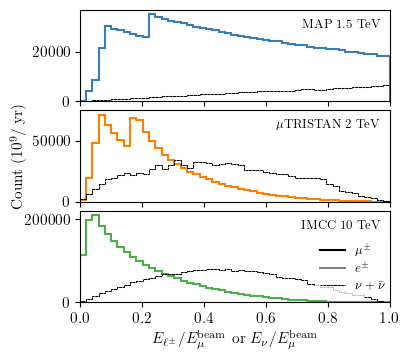

In [35]:
import matplotlib.gridspec as gridspec

# Create figure and gridspec
fig = plt.figure(figsize=(4.0, 3.8))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.1)
# ax1.set_title(r'Primary lepton energy spectrum')
LS = (1,(3,0.5))
LW = 1.5
yunits=1e9
# bins = np.logspace(np.log10(0.1), np.log10(10000), 100)
bins = np.linspace(0,1,50)
Emu_mutristan = 2e3/2
Emu_mokhov = 1.5e3/2
Emu_mucols2 = 10e3/2

# First subplot
ax1 = plt.subplot(gs[0])
ax1.hist(MAP_Ehad / Emu_mokhov,
         bins=bins, histtype='step', label='MAP 1.5 TeV', color=pt.cblind_safe_wheel[0], zorder=2, lw=LW)
ax1.hist(MAP_Enu / Emu_mokhov,
         bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)

# Second subplot
ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.hist(MUT_Ehad/ Emu_mutristan,
         bins=bins, histtype='step', label=r'$\mu$TRISTAN 2 TeV', color=pt.cblind_safe_wheel[1], zorder=2, lw=LW)
ax2.hist(MUT_Enu/ Emu_mutristan,
         bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)

# Third subplot
ax3 = plt.subplot(gs[2], sharex=ax1)
ax3.hist(IMCC_Ehad / Emu_mucols2,
         bins=bins, histtype='step', label='IMCC 10 TeV', color=pt.cblind_safe_wheel[2], zorder=2, lw=LW)
ax3.hist(IMCC_Enu / Emu_mucols2,
         bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)


# ax1.hist(sim_mokhov.cco.pnumu[:,0]/Emu_mokhov, weights = sim_mokhov.cco.weights/sim_mokhov.cco.weights.sum()/(bins[1]-bins[0]), bins = bins, histtype = 'step', label = 'Mokhov 1.5 TeV', color = pt.cblind_safe_wheel[0], zorder = 2, lw=LW, ls=LS)
# ax1.hist(sim_mokhov.cco.pnue[:,0]/Emu_mokhov, weights = sim_mokhov.cco.weights/sim_mokhov.cco.weights.sum()/(bins[1]-bins[0]), bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[0],light_factor), zorder = 2, lw=LW, ls=LS)

# ax2.hist(sim_muTs.cco.pnumu[:,0]/Emu_mutristan, weights = sim_muTs.cco.weights/sim_muTs.cco.weights.sum()/(bins[1]-bins[0]), bins = bins, histtype = 'step', label = '$\mu$TRISTAN 2 TeV', color = pt.cblind_safe_wheel[1], zorder = 2, lw=LW, ls=LS)
# ax2.hist(sim_muTs.cco.pnue[:,0]/Emu_mutristan, weights = sim_muTs.cco.weights/sim_muTs.cco.weights.sum()/(bins[1]-bins[0]), bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[1],light_factor), zorder = 2, lw=LW, ls=LS)

# ax3.hist(sim_mucol.cco.pnumu[:,0]/Emu_mucols2, weights = sim_mucol.cco.weights/sim_mucol.cco.weights.sum()/(bins[1]-bins[0]), bins = bins, histtype = 'step', label = 'IMCC-II 10 TeV', color = pt.cblind_safe_wheel[2], zorder = 2, lw=LW, ls=LS)
# ax3.hist(sim_mucol.cco.pnue[:,0]/Emu_mucols2, weights = sim_mucol.cco.weights/sim_mucol.cco.weights.sum()/(bins[1]-bins[0]), bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[2],light_factor), zorder = 2, lw=LW, ls=LS)


ax2.set_ylabel(r'Count ($10^{9}$/ yr)')
ax3.set_xlabel(r'${E_{\ell^\pm}}/{E_\mu^{\rm beam}}$ or ${E_{\nu}}/{E_\mu^{\rm beam}}$')

# Loop over axes and annotate
labels=[r'MAP 1.5 TeV', r'$\mu$TRISTAN 2 TeV', r'IMCC 10 TeV']
for i, ax in enumerate([ax1, ax2, ax3]):
    ax.text(0.97, 0.9, labels[i], transform=ax.transAxes,
            fontsize=9, verticalalignment='top', horizontalalignment='right')
    # ax.set_ylim(0.,0.3)

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\mu^\pm$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$e^\pm$')
lighter_line = plt.Line2D([], [], color='black', zorder=2, lw=LW*0.5, ls=LS, label=r'$\nu+\bar\nu$')
leg2 = ax3.legend(handles=[dark_line, light_line, lighter_line], loc=(0.76, 0.06), title='', fontsize=9, frameon=True, framealpha=0.75, edgecolor='None')
# leg2 = ax3.legend(handles=[dark_line, light_line], loc=(0.79, 0.1), title='', fontsize=10, frameon=True, framealpha=0.75)

ax1.set_xlim(0, 1)
ax2.set_xlim(0, 1)
ax3.set_xlim(0, 1)

# Adjust labels and layout
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.savefig('plots/paper_plots/lepton_energy.pdf', bbox_inches = 'tight', dpi = 500)

In [27]:

from DarkNews import const

C_LL_dic = {}
C_LL_dic['e'] = 0.7276
C_LL_dic['m'] = -0.2730
C_LL_dic['t'] = -0.2730


def total_cross_section(Enu, nuf, anu=False, C_LR=0.2334, m=const.m_e):
    """
    Calculate the total cross section ignoring terms proportional to alpha_EM.
    
    Parameters:
    E_nu : float
        Neutrino energy.
    C_LL : float
        Coupling constant for LL component.
    C_LR : float
        Coupling constant for LR component.
    m : float
        Mass of the lepton in GeV.
    
    Returns:
    tuple: Total cross sections for (neutrino-electron -> neutrino-lepton-electron) and (antineutrino-electron -> antineutrino-lepton-electron).
    """

    C_LL = C_LL_dic[nuf]
    s = 2*m*Enu #+ m**2
    prefactor = const.Gf**2 * s / np.pi

    y_max = 2 * Enu / (2 * Enu + m)

    if not anu:
        term1 = (C_LL**2) * y_max
        term2 = (C_LR**2) * (y_max - y_max**2 + y_max**3 / 3)
        term3 = (- C_LL * C_LR * m / (2 * Enu)) * y_max**2
        
        sigma = prefactor * (term1 + term2 + term3)
    else:

        term1 = (C_LR**2) * y_max
        term2 = (C_LL**2) * (y_max - y_max**2 + y_max**3 / 3)
        term3 = (- C_LL * C_LR * m / (2 * Enu)) * y_max**2
        sigma = prefactor * (term1 + term2 + term3)
                
    return sigma*const.invGeV2_to_cm2
tex_labels = {}
tex_labels['e'] = r'e'
tex_labels['m'] = r'\mu'
tex_labels['l'] = r'\tau'
from DarkNews import plot_tools as pt


In [94]:
from scipy import interpolate

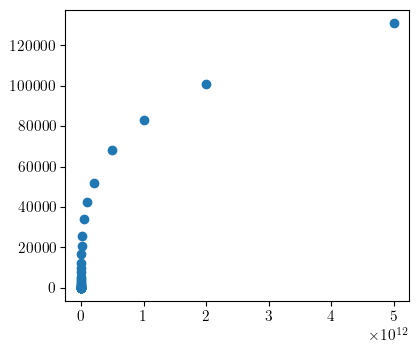

In [136]:
data = np.genfromtxt('rare_xsecs/Alfonso_data.dat').T
plt.plot(data[0], data[1], 'o')

In [260]:
leptonic_electron=True
leptonic_trident=True
XLOG = False
experiment = 'imcc'
Emu_dic = {'mutristan':1e3, 'imcc':5e3, 'map':0.750e3}
Emu = Emu_dic[experiment]
if XLOG:
    E = np.geomspace(10, 3*Emu, 100)
    Ebins = np.geomspace(10, 3*Emu, 20, endpoint=True)
else:
    E = np.linspace(10, Emu, 100)
    Ebins = np.linspace(10, 3*Emu, 20, endpoint=True)

rate, _ = np.histogram(nus_muT['E'], bins = Ebins, weight = nus_muT['w'])
# Rates = {'mutristan': nus_muT['w'], 'imcc': nus_mucol['w'], 'map': nus_mokhov['w']}


TypeError: histogram() got an unexpected keyword argument 'weight'

In [245]:
sigma_e_nu(Ebins)/sigma_CC_nu(Ebins)

array([1.45611286e-39, 1.45612804e-39, 1.45613837e-39, 1.45614540e-39,
       1.45615018e-39, 1.45615344e-39, 1.45626309e-39, 1.46127372e-39,
       1.46847793e-39, 1.48489114e-39, 1.49627197e-39, 1.52305174e-39,
       1.54640692e-39, 1.59585915e-39, 1.65026165e-39, 1.74529364e-39,
       1.81647797e-39, 1.96691582e-39, 2.10950339e-39, 2.36984152e-39])

In [1]:
# fig, ax = pt.std_fig(figsize=(5, 5))
fig = plt.figure(figsize=(5.0, 5.))
gs = gridspec.GridSpec(2, 1, height_ratios=[4, 1], hspace=0.1)

ax = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# ax.plot(E, 0.66e-38*E/E, ls='-', label=r'$\nu_e$CC', c='black', lw=1.5)
# ax.plot(E, 0.33e-38*E/E, ls=(1,(3,1)), label=r'$\bar\nu_e$CC', c='black', lw=1.5)
# e, sigma = np.loadtxt('rare_xsecs/tot_xsec_lightquarks.dat', unpack=True)
data_p = np.genfromtxt('rare_xsecs/Alfonso_data_proton.dat').T
data_n = np.genfromtxt('rare_xsecs/Alfonso_data_neutron.dat').T
sigma_CC_nu = interpolate.interp1d(data[0], (data_n[1]+data_p[1])/2*1e-36, kind='linear', fill_value='extrapolate', bounds_error=False)
ax.plot(E, sigma_CC_nu(E)/E, ls='-', label=r'$\nu_e$CC', c='black', lw=1.5)
ax.plot(E, 0.289/0.66*sigma_CC_nu(E)/E, ls='-', label=r'$\nu$NC', c='lightgrey', lw=1.5)

data_p = np.genfromtxt('rare_xsecs/Alfonso_data_proton.dat').T
data_n = np.genfromtxt('rare_xsecs/Alfonso_data_neutron.dat').T
sigma_CC_nubar = interpolate.interp1d(data[0], (data_n[6]+data_p[6])/2*1e-36, kind='linear', fill_value='extrapolate', bounds_error=False)
ax.plot(E, sigma_CC_nubar(E)/E, ls=(1,(3,1)), label=r'$\bar\nu_e$CC', c='black', lw=1.5)
ax.plot(E, 0.289/0.66*sigma_CC_nubar(E)/E, ls=(1,(3,1)), label=r'$\bar\nu$NC', c='lightgrey', lw=1.5)


data_p = np.genfromtxt('rare_xsecs/Alfonso_data_proton.dat').T
data_n = np.genfromtxt('rare_xsecs/Alfonso_data_neutron.dat').T
sigma_charm_nu = interpolate.interp1d(data[0], (data_n[1]*data_n[3]+data_p[1]*data_p[3])/2*1e-36, kind='linear', fill_value=np.nan, bounds_error=False)
ax.plot(E, sigma_charm_nu(E)/E, ls='-', label=r'$\nu_e$CC (charm)', c='orange', lw=1.5)

data_p = np.genfromtxt('rare_xsecs/Alfonso_data_proton.dat').T
data_n = np.genfromtxt('rare_xsecs/Alfonso_data_neutron.dat').T
sigma_charm_nubar = interpolate.interp1d(data[0], (data_n[6]*data_n[8]+data_p[6]*data_p[8])/2*1e-36, kind='linear', fill_value=np.nan, bounds_error=False)
ax.plot(E, sigma_charm_nubar(E)/E, ls=(1,(3,1)), label=r'$\bar\nu_e$CC (charm)', c='orange', lw=1.5)


e, ratio = np.loadtxt('rare_xsecs/tot_xsec_cohpi0_C.dat', unpack=True)
sigma_cohpi0 = interpolate.interp1d(e, ratio*1e-40/12, kind='linear', fill_value=ratio[-1]*1e-40/12, bounds_error=False)
ax.plot(E, sigma_cohpi0(E)/E, ls=(1,(3,1)), label=r'coh$\pi^0$', c='gray')

if leptonic_electron:
    sigma_e_nu = lambda x: total_cross_section(x, nuf='e', anu=False)
    dsigma = np.sqrt(sigma_e_nu(Ebins)/sigma_CC_nu(Ebins)*Rates[experiment])/Rates[experiment] * sigma_CC_nu(Ebins)
    ax.plot(E, sigma_e_nu(E)/E, ls='-', label=r'$\nu_e - e$', c='deeppink')
    plt.fill_between(Ebins, (sigma_e_nu(Ebins) - dsigma)/Ebins, (sigma_e_nu(Ebins) + dsigma)/Ebins, color='deeppink', alpha=0.2)
    # ax.plot(E, total_cross_section(E, nuf='e', anu=True)/E, ls=(1,(3,1)), label=r'$\bar\nu_e - e$', c='deeppink')

if leptonic_trident:

    flavors = ['e','m','l']
    targets = ['O16']
    colors = iter(['lightblue', 'dodgerblue', 'blue', 'lightgreen', 'darkgreen', 'darkgreen'])
    for target in targets:
        for nui in flavors:
            for nuf in flavors:
                for minus_lep in flavors:
                    for plus_lep in flavors:
                        if not nui == 'l' and not nui == 'm':
                            try:                
                                xsec = np.loadtxt(f'rare_xsecs/trident_production/v{nui}{target}TOv{nuf}{minus_lep}{plus_lep.capitalize()}X_tot.dat').T
                                label = fr'$\nu_{tex_labels[nui]} \to {tex_labels[minus_lep]}^- \nu_{tex_labels[nuf]} {tex_labels[plus_lep]}^+$'
                            except FileNotFoundError:
                                try:
                                    xsec = np.loadtxt(f'rare_xsecs/trident_production/v{nui}{target}TO{minus_lep}v{nuf}{plus_lep.capitalize()}X_tot.dat').T
                                    label = fr'$\nu_{tex_labels[nui]} \to {tex_labels[minus_lep]}^-\nu_{tex_labels[nuf]} {tex_labels[plus_lep]}^+$'
                                except FileNotFoundError:
                                    continue
                            c = next(colors)
                            if minus_lep == 'e':
                                ax.plot(xsec[0], xsec[1]/xsec[0]/16,'-', lw=1.5, label=label, color=c, ls=(1,(2,0.5)))
                            else:
                                ax.plot(xsec[0], xsec[1]/xsec[0]/16,'-', lw=1.5, label=label, color=c)


LS = '-'# (1,(3,0.5))
LW = 1.5
yunits=1e9
bins = np.geomspace(10, Emu, 100) if XLOG else np.linspace(10, Emu, 100)

if experiment == 'map':
    ax2.hist(nus_mokhov['E'], weights=nus_mokhov['w'] / yunits,
             bins=bins, histtype='stepfilled', edgecolor='black', facecolor='whitesmoke', zorder=2, lw=LW*0.5, ls=LS, label=r'MAP', density=True)
elif experiment == 'mutristan':
    ax2.hist(nus_muT['E'], weights=nus_muT['w'] / yunits,
            bins=bins, histtype='stepfilled', edgecolor='black', facecolor='whitesmoke', zorder=2, lw=LW*0.5, ls=LS, label=r'$\mu$TRISTAN', density=True)
elif experiment == 'imcc':
    ax2.hist(nus_mucol['E'] , weights=nus_mucol['w'] / yunits,
             bins=bins, histtype='stepfilled', edgecolor='black', facecolor='whitesmoke', zorder=2, lw=LW*0.5, ls=LS, label=r'IMCC', density=True)
else: 
    print("No experiment selected")

ax2.set_ylabel(r'rate  (a.u.)')
ax2.set_xlabel(r'$E_{\nu}$ [GeV]')
ax2.legend(loc='upper right', ncol=1, frameon=True, fontsize=8.5, framealpha=0.9, edgecolor='None')

ax.set_ylim(1e-45, 2e-38)
# ax.set_xlabel(r'$E_{\nu}$ [GeV]')
if XLOG:
    ax.set_xlim(1e1, 3*Emu)
    ax2.set_xlim(1e1, 3*Emu)
    ax.set_xscale('log')
    ax2.set_xscale('log')
    ax2.set_yscale('log')
else:
    ax.set_xlim(1e1, Emu)
    ax2.set_xlim(1e1, Emu)
ax.set_yscale('log')
ax.set_xticklabels([])
ax.set_ylabel(r'$\sigma_{\rm nucleon\, or\, e}/E_\nu$ [cm$^2$/GeV]')
ax.set_title(r'$\nu_e$ cross sections')
# ax.legend(loc='lower right', ncol=2, frameon=True, fontsize=8.5, framealpha=0.9, edgecolor='None')

fig.savefig('plots/paper_plots/cross_sections_tri.pdf', bbox_inches='tight')

NameError: name 'plt' is not defined

In [258]:
dsigma/sigma_e_nu(Ebins)

array([0.23020597, 0.23020477, 0.23020395, 0.2302034 , 0.23020302,
       0.23020276, 0.2301941 , 0.22979909, 0.22923472, 0.22796427,
       0.22709566, 0.2250903 , 0.22338407, 0.21989574, 0.21624083,
       0.21027123, 0.20610999, 0.19807115, 0.19125993, 0.18044899])

[None, None, None, None, None, None]

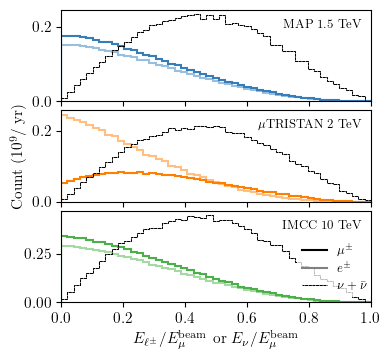

In [21]:
import matplotlib.gridspec as gridspec

# Create figure and gridspec
fig = plt.figure(figsize=(4.0, 3.8))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.1)
# ax1.set_title(r'Primary lepton energy spectrum')
LS = (1,(3,0.5))
LW = 1.5
yunits=1e9
# bins = np.logspace(np.log10(0.1), np.log10(10000), 100)
bins = np.linspace(0,1,50)
Emu_mutristan = 2e3/2
Emu_mokhov = 1.5e3/2
Emu_mucols2 = 10e3/2

# First subplot
ax1 = plt.subplot(gs[0])
ax1.hist(mus_mokhov['E'] / Emu_mokhov, weights=mus_mokhov['w'] / yunits,
         bins=bins, histtype='step', label='MAP 1.5 TeV', color=pt.cblind_safe_wheel[0], zorder=2, lw=LW)
ax1.hist(es_mokhov['E'] / Emu_mokhov, weights=es_mokhov['w'] / yunits,
         bins=bins, histtype='step', color=pt.lighten_color(pt.cblind_safe_wheel[0],light_factor), zorder=2-0.1, lw=LW)
# ax1.hist(nus_mokhov['Enumu'] / Emu_mokhov, weights=nus_mokhov['wnumu'] / yunits,
#          bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)
# ax1.hist(nus_mokhov['Enue'] / Emu_mokhov, weights=nus_mokhov['wnue'] / yunits,
#          bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)
ax1.hist(nus_mokhov['E'] / Emu_mokhov, weights=nus_mokhov['w'] / yunits,
         bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)

# Second subplot
ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.hist(mus_muT['E'] / Emu_mutristan, weights=mus_muT['w'] / yunits,
         bins=bins, histtype='step', label=r'$\mu$TRISTAN 2 TeV', color=pt.cblind_safe_wheel[1], zorder=2, lw=LW)
ax2.hist(es_muT['E'] / Emu_mutristan, weights=es_muT['w'] / yunits,
         bins=bins, histtype='step', color=pt.lighten_color(pt.cblind_safe_wheel[1],light_factor), zorder=2-0.1, lw=LW)
# ax2.hist(nus_muT['Enumu'] / Emu_mutristan, weights=nus_muT['wnumu'] / yunits,
#          bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)
# ax2.hist(nus_muT['Enue'] / Emu_mutristan, weights=nus_muT['wnue'] / yunits,
#          bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)
ax2.hist(nus_muT['E'] / Emu_mutristan, weights=nus_muT['w'] / yunits,
         bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)

# Third subplot
ax3 = plt.subplot(gs[2], sharex=ax1)
ax3.hist(mus_mucol['E'] / Emu_mucols2, weights=mus_mucol['w'] / yunits,
         bins=bins, histtype='step', label='IMCC 10 TeV', color=pt.cblind_safe_wheel[2], zorder=2, lw=LW)
ax3.hist(es_mucol['E'] / Emu_mucols2, weights=es_mucol['w'] / yunits,
         bins=bins, histtype='step', color=pt.lighten_color(pt.cblind_safe_wheel[2],light_factor), zorder=2-0.1, lw=LW)
# ax3.hist(nus_mucol['Enumu'] / Emu_mucols2, weights=nus_mucol['wnumu'] / yunits,
#          bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)
# ax3.hist(nus_mucol['Enue'] / Emu_mucols2, weights=nus_mucol['wnue'] / yunits,
#          bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)
ax3.hist(nus_mucol['E'] / Emu_mucols2, weights=nus_mucol['w'] / yunits,
         bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS)

ax2.set_ylabel(r'Count ($10^{9}$/ yr)')
ax3.set_xlabel(r'${E_{\ell^\pm}}/{E_\mu^{\rm beam}}$ or ${E_{\nu}}/{E_\mu^{\rm beam}}$')

# Loop over axes and annotate
labels=[r'MAP 1.5 TeV', r'$\mu$TRISTAN 2 TeV', r'IMCC 10 TeV']
for i, ax in enumerate([ax1, ax2, ax3]):
    ax.text(0.97, 0.9, labels[i], transform=ax.transAxes,
            fontsize=9, verticalalignment='top', horizontalalignment='right')
    # ax.set_ylim(0.,0.3)

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\mu^\pm$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$e^\pm$')
lighter_line = plt.Line2D([], [], color='black', zorder=2, lw=LW*0.5, ls=LS, label=r'$\nu+\bar\nu$')
leg2 = ax3.legend(handles=[dark_line, light_line, lighter_line], loc=(0.76, 0.06), title='', fontsize=9, frameon=True, framealpha=0.75, edgecolor='None')
# leg2 = ax3.legend(handles=[dark_line, light_line], loc=(0.79, 0.1), title='', fontsize=10, frameon=True, framealpha=0.75)

ax1.set_xlim(0, 1)
ax2.set_xlim(0, 1)
ax3.set_xlim(0, 1)

# Adjust labels and layout
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
# plt.savefig('plots/paper_plots/lepton_energy.pdf', bbox_inches = 'tight', dpi = 500)

# Angle

In [360]:
def get_angle(df):
    return np.arccos(df['pz']/np.sqrt(df['px']**2 + df['py']**2 + df['pz']**2))

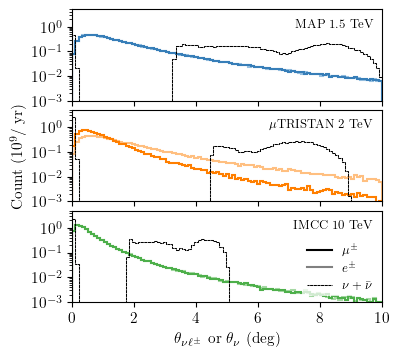

In [361]:
import matplotlib.gridspec as gridspec

# Create figure and gridspec
fig = plt.figure(figsize=(4., 3.8))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.1)
# ax1.set_title(r'Primary lepton energy spectrum')
LS = (1,(3,0.5))
LW = 1.5
# bins = np.logspace(np.log10(0.1), np.log10(10000), 100)

bins = np.linspace(0,10,100)
yunits=1e9
xunits = 180/np.pi

kwargs = {'histtype': 'step', 'lw': LW, 'bins': bins, 'cumulative': False, 'density': True}

# First subplot
ax1 = plt.subplot(gs[0])
h1,b1,_= ax1.hist(get_angle(mus_mokhov)*xunits, weights=mus_mokhov['w'] / yunits,
         label='MAP 1.5 TeV', color=pt.cblind_safe_wheel[0], zorder=2, **kwargs)
ax1.hist(get_angle(es_mokhov)*xunits, weights=es_mokhov['w'] / yunits,
         color=pt.lighten_color(pt.cblind_safe_wheel[0],light_factor), zorder=2-0.1, **kwargs)

# Second subplot
ax2 = plt.subplot(gs[1], sharex=ax1)
h2,b2,_= ax2.hist(get_angle(mus_muT)*xunits, weights=mus_muT['w'] / yunits,
         label=r'$\mu$TRISTAN 2 TeV', color=pt.cblind_safe_wheel[1], zorder=2, **kwargs)
ax2.hist(get_angle(es_muT)*xunits, weights=es_muT['w'] / yunits,
         color=pt.lighten_color(pt.cblind_safe_wheel[1],light_factor), zorder=2-0.1, **kwargs)

# Third subplot
ax3 = plt.subplot(gs[2], sharex=ax1)
h3,b3,_= ax3.hist(get_angle(mus_mucol)*xunits, weights=mus_mucol['w'] / yunits,
         label='IMCC 10 TeV', color=pt.cblind_safe_wheel[2], zorder=2, **kwargs)
ax3.hist(get_angle(es_mucol)*xunits, weights=es_mucol['w'] / yunits,
         color=pt.lighten_color(pt.cblind_safe_wheel[2],light_factor), zorder=2-0.1, **kwargs)

ax1.hist(np.arccos(cost_mokhov)*180/np.pi, weights = w_mokhov/1e10, bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS, density=True)
# ax1.hist(np.arccos(cost_mokhov)*180/np.pi, weights = w_mokhov/1e10, bins = bins, histtype = 'stepfilled', alpha=0.2, lw=0, color = pt.cblind_safe_wheel[0], zorder = 1, density=True)

ax2.hist(np.arccos(cost_muTs)*180/np.pi, weights = w_muTs/1e10, bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS, density=True)
# ax2.hist(np.arccos(cost_muTs)*180/np.pi, weights = w_muTs/1e10, bins = bins, histtype = 'stepfilled', alpha=0.2, lw=0, color = pt.cblind_safe_wheel[1], zorder = 1, density=True)

ax3.hist(np.arccos(cost_mucol)*180/np.pi, weights = w_mucol/1e10, bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS, density=True)
# ax3.hist(np.arccos(cost_mucol)*180/np.pi, weights = w_mucol/1e10, bins = bins, histtype = 'stepfilled', alpha=0.2, lw=0, color = pt.cblind_safe_wheel[2], zorder = 1, density=True)




ax2.set_ylabel(r'Count ($10^{9}$/ yr)')
ax3.set_xlabel(r'$\theta_{\nu\ell^\pm}$ or $\theta_\nu$ (deg)')

# Loop over axes and annotate
labels=[r'MAP 1.5 TeV', r'$\mu$TRISTAN 2 TeV', r'IMCC 10 TeV']
for i, ax in enumerate([ax1, ax2, ax3]):
    ax.text(0.97, 0.9, labels[i], transform=ax.transAxes,
            fontsize=9, verticalalignment='top', horizontalalignment='right')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\mu^\pm$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$e^\pm$')
lighter_line = plt.Line2D([], [], color='black', zorder=2, lw=LW*0.5, ls=LS, label=r'$\nu+\bar\nu$')
leg2 = ax3.legend(handles=[dark_line, light_line, lighter_line], loc=(0.74, 0.06), title='', fontsize=9, frameon=True, framealpha=0.75, edgecolor='None')

for ax in [ax1, ax2, ax3]:
    ax.set_xlim(bins.min(), bins.max()) 
    ax.set_yscale('log')
    ax.set_ylim(1e-3, 5)
    # ax.set_ylim(1e-3, 5)
    # ax.hlines(0.9, 0, 6, color = 'black', lw = 1, ls = '--')

# Adjust labels and layout

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.savefig('plots/paper_plots/lepton_angles.pdf', bbox_inches = 'tight', dpi = 500)

# Pseudo-Rapidity

In [363]:

def eta_from_theta(theta):
    return -np.log(np.tan(theta/2))

def get_eta(df):
    return eta_from_theta(get_angle(df))

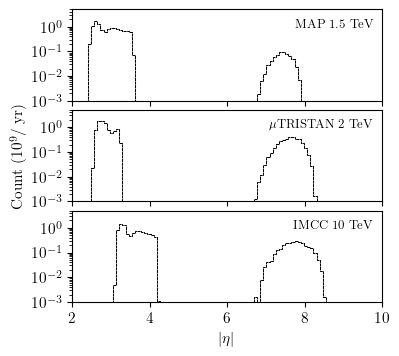

In [359]:
import matplotlib.gridspec as gridspec

# Create figure and gridspec
fig = plt.figure(figsize=(4., 3.8))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.1)
# ax1.set_title(r'Primary lepton energy spectrum')
LS = (1,(3,0.5))
LW = 1.5
# bins = np.logspace(np.log10(0.1), np.log10(10000), 100)

bins = np.linspace(2,10,100)
yunits=1e9
xunits = 1

kwargs = {'histtype': 'step', 'lw': LW, 'bins': bins, 'cumulative': False, 'density': True}

# First subplot
ax1 = plt.subplot(gs[0])
# h1,b1,_= ax1.hist(get_eta(mus_mokhov)*xunits, weights=mus_mokhov['w'] / yunits,
#          label='MAP 1.5 TeV', color=pt.cblind_safe_wheel[0], zorder=2, **kwargs)
# ax1.hist(get_eta(es_mokhov)*xunits, weights=es_mokhov['w'] / yunits,
#          color=pt.lighten_color(pt.cblind_safe_wheel[0],light_factor), zorder=2-0.1, **kwargs)

# # Second subplot
ax2 = plt.subplot(gs[1], sharex=ax1)
# h2,b2,_= ax2.hist(get_eta(mus_muT)*xunits, weights=mus_muT['w'] / yunits,
#          label=r'$\mu$TRISTAN 2 TeV', color=pt.cblind_safe_wheel[1], zorder=2, **kwargs)
# ax2.hist(get_eta(es_muT)*xunits, weights=es_muT['w'] / yunits,
#          color=pt.lighten_color(pt.cblind_safe_wheel[1],light_factor), zorder=2-0.1, **kwargs)

# # Third subplot
ax3 = plt.subplot(gs[2], sharex=ax1)
# h3,b3,_= ax3.hist(get_eta(mus_mucol)*xunits, weights=mus_mucol['w'] / yunits,
#          label='IMCC 10 TeV', color=pt.cblind_safe_wheel[2], zorder=2, **kwargs)
# ax3.hist(get_eta(es_mucol)*xunits, weights=es_mucol['w'] / yunits,
#          color=pt.lighten_color(pt.cblind_safe_wheel[2],light_factor), zorder=2-0.1, **kwargs)

ax1.hist(eta_from_theta(np.arccos(cost_mokhov)), weights = w_mokhov/1e10, bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS, density=True)
ax2.hist(eta_from_theta(np.arccos(cost_muTs)), weights = w_muTs/1e10, bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS, density=True)
ax3.hist(eta_from_theta(np.arccos(cost_mucol)), weights = w_mucol/1e10, bins=bins, histtype='step', color='black', zorder=2, lw=LW*0.5, ls=LS, density=True)


ax2.set_ylabel(r'Count ($10^{9}$/ yr)')
ax3.set_xlabel(r'$|\eta|$')

# Loop over axes and annotate
labels=[r'MAP 1.5 TeV', r'$\mu$TRISTAN 2 TeV', r'IMCC 10 TeV']
for i, ax in enumerate([ax1, ax2, ax3]):
    ax.text(0.97, 0.9, labels[i], transform=ax.transAxes,
            fontsize=9, verticalalignment='top', horizontalalignment='right')

# Create a new legend
# dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\mu^\pm$')
# light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$e^\pm$')
# lighter_line = plt.Line2D([], [], color='black', zorder=2, lw=LW*0.5, ls=LS, label=r'$\nu+\bar\nu$')
# leg2 = ax3.legend(handles=[dark_line, light_line, lighter_line], loc=(0.74, 0.06), title='', fontsize=9, frameon=True, framealpha=0.75, edgecolor='None')

for ax in [ax1, ax2, ax3]:
    ax.set_xlim(bins.min(), bins.max()) 
    ax.set_yscale('log')
    ax.set_ylim(1e-3, 5) 
    # ax.set_ylim(1e-3, 5)
    # ax.hlines(0.9, 0, 6, color = 'black', lw = 1, ls = '--')

# Adjust labels and layout

plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.savefig('plots/paper_plots/pseudorapidity_neutrinos.pdf', bbox_inches = 'tight', dpi = 500)

# Displacement

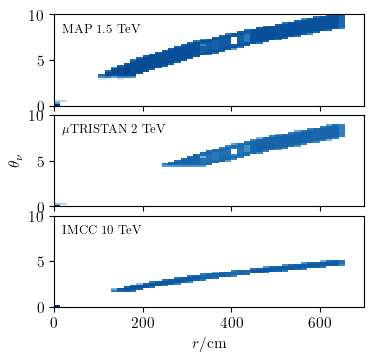

In [469]:
import matplotlib.colors as colors

# Create figure and gridspec
fig = plt.figure(figsize=(4., 3.8))
gs = gridspec.GridSpec(3, 1, height_ratios=[1, 1, 1], hspace=0.1)
# ax1.set_title(r'Primary lepton energy spectrum')
LS = (1,(3,0.5))
LW = 1.5
# bins = np.logspace(np.log10(0.1), np.log10(10000), 100)

r_bins = np.linspace(0,7e2,50)
theta_bins = np.linspace(0,10,50)
yunits=1e9
xunits = 1

kwargs = {'histtype': 'step', 'lw': LW, 'bins': bins, 'cumulative': False, 'density': True}

# First subplot
ax1 = plt.subplot(gs[0])
# h1,b1,_= ax1.hist(get_eta(mus_mokhov)*xunits, weights=mus_mokhov['w'] / yunits,
#          label='MAP 1.5 TeV', color=pt.cblind_safe_wheel[0], zorder=2, **kwargs)
# ax1.hist(get_eta(es_mokhov)*xunits, weights=es_mokhov['w'] / yunits,
#          color=pt.lighten_color(pt.cblind_safe_wheel[0],light_factor), zorder=2-0.1, **kwargs)

# # Second subplot
ax2 = plt.subplot(gs[1], sharex=ax1)
# h2,b2,_= ax2.hist(get_eta(mus_muT)*xunits, weights=mus_muT['w'] / yunits,
#          label=r'$\mu$TRISTAN 2 TeV', color=pt.cblind_safe_wheel[1], zorder=2, **kwargs)
# ax2.hist(get_eta(es_muT)*xunits, weights=es_muT['w'] / yunits,
#          color=pt.lighten_color(pt.cblind_safe_wheel[1],light_factor), zorder=2-0.1, **kwargs)

# # Third subplot
ax3 = plt.subplot(gs[2], sharex=ax1)
# h3,b3,_= ax3.hist(get_eta(mus_mucol)*xunits, weights=mus_mucol['w'] / yunits,
#          label='IMCC 10 TeV', color=pt.cblind_safe_wheel[2], zorder=2, **kwargs)
# ax3.hist(get_eta(es_mucol)*xunits, weights=es_mucol['w'] / yunits,
#          color=pt.lighten_color(pt.cblind_safe_wheel[2],light_factor), zorder=2-0.1, **kwargs)

ax1.hist2d(np.sqrt(mokhov.get_data()[0]**2 + mokhov.get_data()[1]**2), 180/np.pi*np.arccos(mokhov.get_data()[-1]), weights = w_mokhov/1e10, bins=[r_bins,theta_bins], cmin=1e-10, norm=colors.LogNorm(),cmap='Blues')
ax2.hist2d(np.sqrt(muTs.get_data()[0]**2 + muTs.get_data()[1]**2), 180/np.pi*np.arccos(muTs.get_data()[-1]), weights = w_muTs/1e10, bins=[r_bins,theta_bins], cmin=1e-10, norm=colors.LogNorm(),cmap='Blues')
ax3.hist2d(np.sqrt(mucol.get_data()[0]**2 + mucol.get_data()[1]**2), 180/np.pi*np.arccos(mucol.get_data()[-1]), weights = w_mucol/1e10, bins=[r_bins,theta_bins], cmin=1e-10, norm=colors.LogNorm(),cmap='Blues')


ax2.set_ylabel(r'$\theta_\nu$')
ax3.set_xlabel(r'$r/$cm')

# Loop over axes and annotate
labels=[r'MAP 1.5 TeV', r'$\mu$TRISTAN 2 TeV', r'IMCC 10 TeV']
for i, ax in enumerate([ax1, ax2, ax3]):
    ax.text(0.025, 0.9, labels[i], transform=ax.transAxes,
            fontsize=9, verticalalignment='top', horizontalalignment='left')

# Create a new legend
# dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\mu^\pm$')
# light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$e^\pm$')
# lighter_line = plt.Line2D([], [], color='black', zorder=2, lw=LW*0.5, ls=LS, label=r'$\nu+\bar\nu$')
# leg2 = ax3.legend(handles=[dark_line, light_line, lighter_line], loc=(0.74, 0.06), title='', fontsize=9, frameon=True, framealpha=0.75, edgecolor='None')

for ax in [ax1, ax2, ax3]:
    ax.set_xlim(r_bins.min(), r_bins.max()) 
    ax.set_ylim(theta_bins.min(), theta_bins.max()) 
    # ax.set_xscale('log')
    # ax.set_xlim(1e-2, 500)
    # ax.hlines(0.9, 0, 6, color = 'black', lw = 1, ls = '--')

# Adjust labels and layout
plt.setp(ax1.get_xticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
plt.savefig('plots/paper_plots/radius_v_angle.pdf', bbox_inches = 'tight', dpi = 500)

In [221]:
print(b1[np.argmin(np.abs(h1 - 0.67))], b1[np.argmin(np.abs(h1 - 0.9))])
print(b2[np.argmin(np.abs(h2 - 0.67))], b2[np.argmin(np.abs(h2 - 0.9))])
print(b3[np.argmin(np.abs(h3 - 0.67))], b3[np.argmin(np.abs(h3 - 0.9))])

1.9191919191919191 4.343434343434343
1.1111111111111112 2.4242424242424243
0.6060606060606061 1.7171717171717171


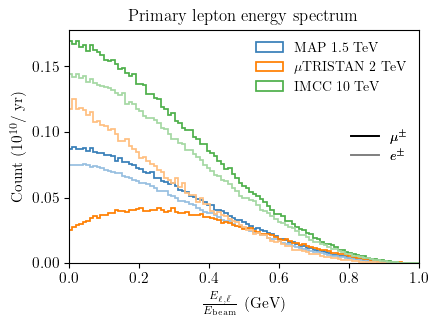

In [172]:
# bins = np.logspace(np.log10(0.1), np.log10(10000), 100)
bins = np.linspace(0,1,100)
Emu_mutristan = 2e3/2
Emu_mokhov = 1.5e3/2
Emu_mucols2 = 10e3/2


light_factor = 0.5
LW=1.25

fig, ax = pt.std_fig()

ax.hist(mus_mokhov['E']/Emu_mokhov, weights = mus_mokhov['w']/1e10, bins = bins, histtype = 'step', label = 'MAP 1.5 TeV', color = pt.cblind_safe_wheel[0], zorder = 2, lw=LW)
ax.hist(es_mokhov['E']/Emu_mokhov, weights = es_mokhov['w']/1e10, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[0],light_factor), zorder = 2, lw=LW)


ax.hist(mus_muT['E']/Emu_mutristan, weights = mus_muT['w']/1e10, bins = bins, histtype = 'step', label = r'$\mu$TRISTAN 2 TeV', color = pt.cblind_safe_wheel[1], zorder = 2, lw=LW)
ax.hist(es_muT['E']/Emu_mutristan, weights = es_muT['w']/1e10, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[1],light_factor), zorder = 2, lw=LW)

ax.hist(mus_mucol['E']/Emu_mucols2, weights = mus_mucol['w']/1e10, bins = bins, histtype = 'step', label = 'IMCC 10 TeV', color = pt.cblind_safe_wheel[2], zorder = 2, lw=LW)
ax.hist(es_mucol['E']/Emu_mucols2, weights = es_mucol['w']/1e10, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[2],light_factor), zorder = 2, lw=LW)

# plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
# plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

# standard legend
leg1 = ax.legend(loc = 'upper right')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\mu^\pm$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$e^\pm$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='center right')

plt.gca().add_artist(leg1)
plt.gca().add_artist(leg2)

ax.set_xlabel(r'$\frac{E_{\ell,\bar{\ell}}}{E_{\rm beam}}$ (GeV)')
ax.set_ylabel(r'Count ($10^{10}$/ yr)')
# plt.xscale('log')
ax.set_xlim(bins.min(), bins.max())
ax.set_title(r'Primary lepton energy spectrum', fontsize = 12)
plt.savefig('plots_Luc/posterplots/pl_e.jpg', bbox_inches = 'tight', dpi = 500)

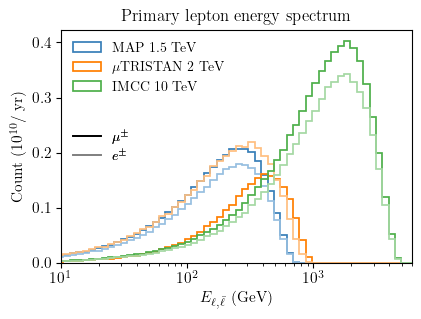

In [356]:
bins = np.logspace(np.log10(0.1), np.log10(10000), 100)

fig, ax = pt.std_fig()

ax.hist(mus_mokhov['E'], weights = mus_mokhov['w']/1e10, bins = bins, histtype = 'step', label = 'MAP 1.5 TeV', color = pt.cblind_safe_wheel[0], zorder = 2, lw=LW)
ax.hist(es_mokhov['E'], weights = es_mokhov['w']/1e10, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[0],light_factor), zorder = 2, lw=LW)


ax.hist(mus_muT['E'], weights = mus_muT['w']/1e10, bins = bins, histtype = 'step', label = r'$\mu$TRISTAN 2 TeV', color = pt.cblind_safe_wheel[1], zorder = 2, lw=LW)
ax.hist(es_muT['E'], weights = es_muT['w']/1e10, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[1],light_factor), zorder = 2, lw=LW)

ax.hist(mus_mucol['E'], weights = mus_mucol['w']/1e10, bins = bins, histtype = 'step', label = 'IMCC 10 TeV', color = pt.cblind_safe_wheel[2], zorder = 2, lw=LW)
ax.hist(es_mucol['E'], weights = es_mucol['w']/1e10, bins = bins, histtype = 'step', color = pt.lighten_color(pt.cblind_safe_wheel[2],light_factor), zorder = 2, lw=LW)

# plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))
# plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

# standard legend
leg1 = ax.legend(loc = 'upper left')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$\mu^\pm$')
light_line = plt.Line2D([], [], color='gray', lw=LW, label=r'$e^\pm$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='center left')

plt.gca().add_artist(leg1)
plt.gca().add_artist(leg2)

ax.set_xlabel(r'$E_{\ell,\bar{\ell}}$ (GeV)')
ax.set_ylabel(r'Count ($10^{10}$/ yr)')
plt.xscale('log')
ax.set_xlim(10,0.6*10**4)
ax.set_title(r'Primary lepton energy spectrum', fontsize = 12)
plt.savefig('plots_Luc/posterplots/pl_e.jpg', bbox_inches = 'tight', dpi = 500)

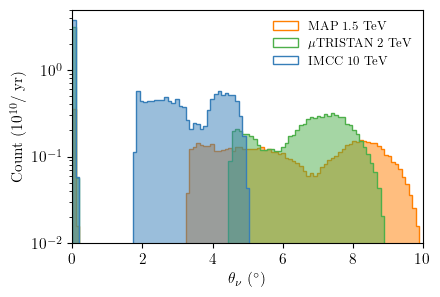

In [294]:
fig, ax = pt.std_fig()

bins = np.linspace(0, 10, 100)

ax.hist(np.arccos(cost_mokhov)*180/np.pi, weights = w_mokhov/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[1], zorder = 1, label=r'MAP $1.5$ TeV')
ax.hist(np.arccos(cost_mokhov)*180/np.pi, weights = w_mokhov/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[1], zorder = 1)

ax.hist(np.arccos(cost_muTs)*180/np.pi, weights = w_muTs/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[2], zorder = 1, label=r'$\mu$TRISTAN $2$ TeV')
ax.hist(np.arccos(cost_muTs)*180/np.pi, weights = w_muTs/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[2], zorder = 1)

ax.hist(np.arccos(cost_mucol)*180/np.pi, weights = w_mucol/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[0], zorder = 1, label=r'IMCC $10$ TeV')
ax.hist(np.arccos(cost_mucol)*180/np.pi, weights = w_mucol/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[0], zorder = 1)

# standard legend
leg1 = ax.legend(loc = 'upper right', fontsize=9)

ax.set_xlabel(r'$\theta_\nu$ ($^\circ$)')
ax.set_ylabel(r'Count ($10^{10}$/ yr)')
ax.set_yscale('log')
ax.set_xlim(0,10)
ax.set_ylim(1e-2,5)
# ax.set_title(r'Primary lepton angle', fontsize = 12)
plt.savefig('plots/paper_plots/neutrino_angle.pdf', bbox_inches = 'tight', dpi = 500)

Text(0.5, 1.0, 'Primary lepton transverse momentum spectrum')

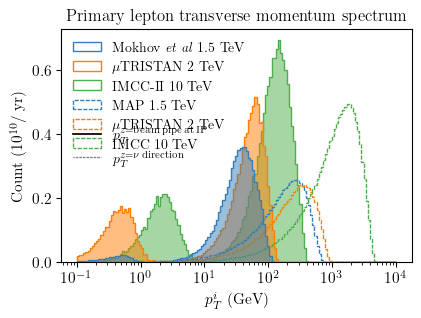

In [20]:
fig, ax = pt.std_fig()

bins = np.geomspace(0.1, 10e3, 150)
dens = False

# ax.hist(pd.concat([pT[3],pT[2]], axis = 0), weights=pd.concat([es_mokhov['w'], mus_mokhov['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[0], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(pT_mokhov, weights = w_mokhov/1e10, bins = bins, histtype = 'step', label = 'Mokhov \emph{et al} 1.5 TeV', color = pt.cblind_safe_wheel[0], zorder = 3, density=dens)
ax.hist(pT_mokhov, weights = w_mokhov/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[0], zorder = 3, density=dens)

# ax.hist(pd.concat([pT[5],pT[4]], axis = 0), weights=pd.concat([es_muT['w'], mus_muT['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[1], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(pT_muTs, weights = w_muTs/1e10, bins = bins, histtype = 'step', label = r'$\mu$TRISTAN 2 TeV', color = pt.cblind_safe_wheel[1], zorder = 2, density=dens)
ax.hist(pT_muTs, weights = w_muTs/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[1], zorder = 2, density=dens)

# ax.hist(pd.concat([pT[1],pT[0]], axis = 0), weights=pd.concat([es_mucol['w'], mus_mucol['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[2], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(pT_mucol, weights = w_mucol/1e10, bins = bins, histtype = 'step', label = 'IMCC-II 10 TeV', color = pt.cblind_safe_wheel[2], zorder = 1, density=dens)
ax.hist(pT_mucol, weights = w_mucol/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[2], zorder = 1, density=dens)



ax.hist(np.concatenate([mus_mokhov['E'],es_mokhov['E']]), weights = np.concatenate([mus_mokhov['w'],es_mokhov['w']])/1e10*10, bins = bins, histtype = 'step', label = 'MAP 1.5 TeV', color = pt.cblind_safe_wheel[0], ls=(1,(3,1)), lw=1, density=dens)
ax.hist(np.concatenate([mus_muT['E'],es_muT['E']]), weights = np.concatenate([mus_muT['w'],es_muT['w']])/1e10*10, bins = bins, histtype = 'step', label = r'$\mu$TRISTAN 2 TeV', color = pt.cblind_safe_wheel[1], ls=(1,(3,1)), lw=1, density=dens)
ax.hist(np.concatenate([mus_mucol['E'],es_mucol['E']]), weights = np.concatenate([mus_mucol['w'],es_mucol['w']])/1e10*10, bins = bins, histtype = 'step', label = 'IMCC 10 TeV', color = pt.cblind_safe_wheel[2], ls=(1,(3,1)), lw=1, density=dens)


# standard legend
leg1 = ax.legend(loc = 'upper left')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$p_T^{z = {\rm beam\,pipe\,at\,IP}}$')
light_line = plt.Line2D([], [], color='gray', lw=LW*0.75, ls=(1,(2,0.75)), label=r'$p_T^{z = \nu \, {\rm direction}}$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='center left')

plt.gca().add_artist(leg1)
# plt.gca().add_artist(leg2)

ax.set_xlabel(r'$p_T^{i}$ (GeV)')
ax.set_ylabel(r'Count ($10^{10}$/ yr)')
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title(r'Primary lepton transverse momentum spectrum', fontsize = 12)
# plt.savefig('plots_Luc/posterplots/pl_pT.jpg', bbox_inches = 'tight', dpi = 500)

In [ ]:
fig, ax = pt.std_fig()

bins = np.geomspace(0.1, 10e3, 150)
dens = False

# ax.hist(pd.concat([pT[3],pT[2]], axis = 0), weights=pd.concat([es_mokhov['w'], mus_mokhov['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[0], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(pT_mokhov, weights = w_mokhov/1e10, bins = bins, histtype = 'step', label = 'Mokhov \emph{et al} 1.5 TeV', color = pt.cblind_safe_wheel[0], zorder = 3, density=dens)
ax.hist(pT_mokhov, weights = w_mokhov/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[0], zorder = 3, density=dens)

# ax.hist(pd.concat([pT[5],pT[4]], axis = 0), weights=pd.concat([es_muT['w'], mus_muT['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[1], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(pT_muTs, weights = w_muTs/1e10, bins = bins, histtype = 'step', label = r'$\mu$TRISTAN 2 TeV', color = pt.cblind_safe_wheel[1], zorder = 2, density=dens)
ax.hist(pT_muTs, weights = w_muTs/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[1], zorder = 2, density=dens)

# ax.hist(pd.concat([pT[1],pT[0]], axis = 0), weights=pd.concat([es_mucol['w'], mus_mucol['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[2], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(pT_mucol, weights = w_mucol/1e10, bins = bins, histtype = 'step', label = 'IMCC-II 10 TeV', color = pt.cblind_safe_wheel[2], zorder = 1, density=dens)
ax.hist(pT_mucol, weights = w_mucol/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[2], zorder = 1, density=dens)



ax.hist(np.concatenate([mus_mokhov['E'],es_mokhov['E']]), weights = np.concatenate([mus_mokhov['w'],es_mokhov['w']])/1e10*10, bins = bins, histtype = 'step', label = 'MAP 1.5 TeV', color = pt.cblind_safe_wheel[0], ls=(1,(3,1)), lw=1, density=dens)
ax.hist(np.concatenate([mus_muT['E'],es_muT['E']]), weights = np.concatenate([mus_muT['w'],es_muT['w']])/1e10*10, bins = bins, histtype = 'step', label = r'$\mu$TRISTAN 2 TeV', color = pt.cblind_safe_wheel[1], ls=(1,(3,1)), lw=1, density=dens)
ax.hist(np.concatenate([mus_mucol['E'],es_mucol['E']]), weights = np.concatenate([mus_mucol['w'],es_mucol['w']])/1e10*10, bins = bins, histtype = 'step', label = 'IMCC 10 TeV', color = pt.cblind_safe_wheel[2], ls=(1,(3,1)), lw=1, density=dens)


# standard legend
leg1 = ax.legend(loc = 'upper left')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$p_T^{z = {\rm beam\,pipe\,at\,IP}}$')
light_line = plt.Line2D([], [], color='gray', lw=LW*0.75, ls=(1,(2,0.75)), label=r'$p_T^{z = \nu \, {\rm direction}}$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='center left')

plt.gca().add_artist(leg1)
# plt.gca().add_artist(leg2)

ax.set_xlabel(r'$p_T^{i}$ (GeV)')
ax.set_ylabel(r'Count ($10^{10}$/ yr)')
#ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title(r'Primary lepton transverse momentum spectrum', fontsize = 12)
plt.savefig('plots_Luc/posterplots/pl_pT.jpg', bbox_inches = 'tight', dpi = 500)

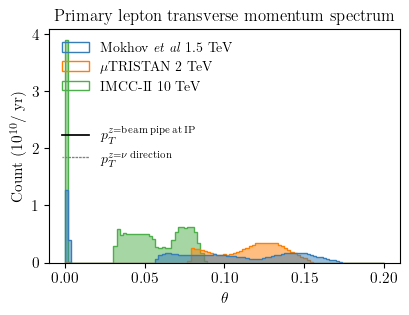

In [302]:
fig, ax = pt.std_fig()

bins = np.linspace(0., 0.2, 100)

# ax.hist(pd.concat([pT[3],pT[2]], axis = 0), weights=pd.concat([es_mokhov['w'], mus_mokhov['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[0], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(np.arcsin(np.sqrt(1 - cost_mokhov**2)), weights = w_mokhov/1e10, bins = bins, histtype = 'step', label = 'Mokhov \emph{et al} 1.5 TeV', color = pt.cblind_safe_wheel[0], zorder = 3)
ax.hist(np.arcsin(np.sqrt(1 - cost_mokhov**2)), weights = w_mokhov/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[0], zorder = 3)

# ax.hist(pd.concat([pT[5],pT[4]], axis = 0), weights=pd.concat([es_muT['w'], mus_muT['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[1], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(np.arcsin(np.sqrt(1 - cost_muTs**2)), weights = w_muTs/1e10, bins = bins, histtype = 'step', label = r'$\mu$TRISTAN 2 TeV', color = pt.cblind_safe_wheel[1], zorder = 2)
ax.hist(np.arcsin(np.sqrt(1 - cost_muTs**2)), weights = w_muTs/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[1], zorder = 2)

# ax.hist(pd.concat([pT[1],pT[0]], axis = 0), weights=pd.concat([es_mucol['w'], mus_mucol['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[2], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(np.arcsin(np.sqrt(1 - cost_mucol**2)), weights = w_mucol/1e10, bins = bins, histtype = 'step', label = 'IMCC-II 10 TeV', color = pt.cblind_safe_wheel[2], zorder = 1)
ax.hist(np.arcsin(np.sqrt(1 - cost_mucol**2)), weights = w_mucol/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[2], zorder = 1)

# standard legend
leg1 = ax.legend(loc = 'upper left')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$p_T^{z = {\rm beam\,pipe\,at\,IP}}$')
light_line = plt.Line2D([], [], color='gray', lw=LW*0.75, ls=(1,(2,0.75)), label=r'$p_T^{z = \nu \, {\rm direction}}$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='center left')

plt.gca().add_artist(leg1)
# plt.gca().add_artist(leg2)

ax.set_xlabel(r'$\theta$')
ax.set_ylabel(r'Count ($10^{10}$/ yr)')
#ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_title(r'Primary lepton transverse momentum spectrum', fontsize = 12)
plt.savefig('plots_Luc/posterplots/pl_pT.jpg', bbox_inches = 'tight', dpi = 500)

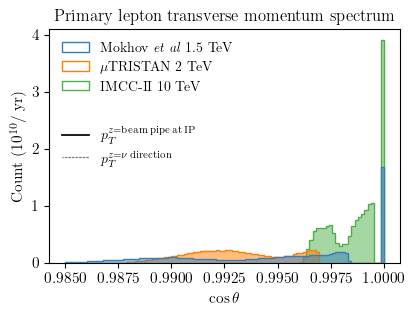

In [291]:
fig, ax = pt.std_fig()

bins = np.geomspace(0.985, 1, 100)

# ax.hist(pd.concat([pT[3],pT[2]], axis = 0), weights=pd.concat([es_mokhov['w'], mus_mokhov['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[0], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(cost_mokhov, weights = w_mokhov/1e10, bins = bins, histtype = 'step', label = 'Mokhov \emph{et al} 1.5 TeV', color = pt.cblind_safe_wheel[0], zorder = 3)
ax.hist(cost_mokhov, weights = w_mokhov/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[0], zorder = 3)

# ax.hist(pd.concat([pT[5],pT[4]], axis = 0), weights=pd.concat([es_muT['w'], mus_muT['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[1], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(cost_muTs, weights = w_muTs/1e10, bins = bins, histtype = 'step', label = r'$\mu$TRISTAN 2 TeV', color = pt.cblind_safe_wheel[1], zorder = 2)
ax.hist(cost_muTs, weights = w_muTs/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[1], zorder = 2)

# ax.hist(pd.concat([pT[1],pT[0]], axis = 0), weights=pd.concat([es_mucol['w'], mus_mucol['w']], axis = 0)/1e10, bins = bins, histtype = 'step', color = pt.cblind_safe_wheel[2], zorder = 2, lw=LW*0.75, ls=(1,(2,0.75)))
ax.hist(cost_mucol, weights = w_mucol/1e10, bins = bins, histtype = 'step', label = 'IMCC-II 10 TeV', color = pt.cblind_safe_wheel[2], zorder = 1)
ax.hist(cost_mucol, weights = w_mucol/1e10, bins = bins, histtype = 'stepfilled', alpha=0.5, lw=0, color = pt.cblind_safe_wheel[2], zorder = 1)

# standard legend
leg1 = ax.legend(loc = 'upper left')

# Create a new legend
dark_line = plt.Line2D([], [], color='black', lw=LW, label=r'$p_T^{z = {\rm beam\,pipe\,at\,IP}}$')
light_line = plt.Line2D([], [], color='gray', lw=LW*0.75, ls=(1,(2,0.75)), label=r'$p_T^{z = \nu \, {\rm direction}}$')
leg2 = ax.legend(handles=[dark_line, light_line], loc='center left')

plt.gca().add_artist(leg1)
# plt.gca().add_artist(leg2)

ax.set_xlabel(r'$\cos\theta$')
ax.set_ylabel(r'Count ($10^{10}$/ yr)')
#ax.set_yscale('log')
# ax.set_xscale('log')
ax.set_title(r'Primary lepton transverse momentum spectrum', fontsize = 12)
plt.savefig('plots_Luc/posterplots/pl_pT.jpg', bbox_inches = 'tight', dpi = 500)

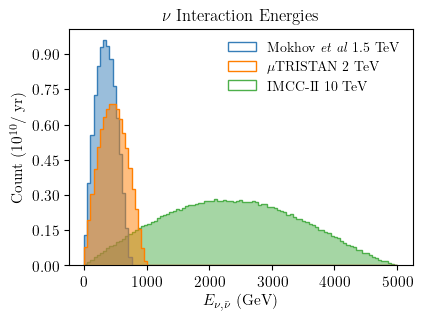

In [270]:
bins = np.linspace(0,5e3, 100)
plt.hist(E_mokhov, weights  = w_mokhov/1e10, histtype = 'step', color = pt.cblind_safe_wheel[0], label = r'Mokhov \emph{et al} 1.5 TeV', bins = bins, zorder = 2)
plt.hist(E_mokhov, weights  = w_mokhov/1e10, histtype = 'stepfilled', alpha=0.5, color = pt.cblind_safe_wheel[0], bins = bins, lw=0, zorder = 2)

plt.hist(E_muTs, weights  = w_muTs/1e10, histtype = 'step', color = pt.cblind_safe_wheel[1], label = r'$\mu$TRISTAN 2 TeV', bins = bins, zorder = 3)
plt.hist(E_muTs, weights  = w_muTs/1e10, histtype = 'stepfilled', alpha=0.5, color = pt.cblind_safe_wheel[1], bins = bins, lw=0, zorder = 3)

plt.hist(E_mucol, weights  = w_mucol/1e10, histtype = 'step', color = pt.cblind_safe_wheel[2], label = r'IMCC-II 10 TeV', bins = bins, zorder = 1)
plt.hist(E_mucol, weights  = w_mucol/1e10, histtype = 'stepfilled', alpha=0.5, color = pt.cblind_safe_wheel[2], bins = bins, lw=0, zorder = 1)


#plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

#plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(70))  # Adjust the interval as needed
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.15))

plt.xlabel(r'$E_{\nu, \bar{\nu}}$ (GeV)')
plt.ylabel(r'Count ($10^{10}$/ yr)')
plt.legend(loc = 'upper right')
#plt.yscale('log')
#plt.xscale('log')
plt.title(r'$\nu$ Interaction Energies')
plt.savefig('plots_Luc/posterplots/nu_e.jpg', bbox_inches = 'tight', dpi = 500)

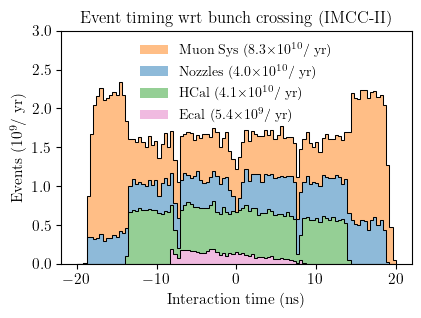

In [258]:
fig, ax = pt.std_fig()

bins = np.linspace(-20, 20, 100)
data = [timesms*1e9, timeshc*1e9, timesno*1e9, timesec*1e9]
weights = [wms/1e9, whc/1e9, wno/1e9, wec/1e9]
colors = ['tab:orange', 'tab:green', 'tab:blue', 'tab:pink']
labels = [r'Muon Sys (8.3$\times10^{10}$/ yr)', r'HCal (4.1$\times10^{10}$/ yr)', r'Nozzles (4.0$\times10^{10}$/ yr)', r'Ecal (5.4$\times10^{9}$/ yr)']

order = [3,1,2,0]
data = [data[order[0]], data[order[1]], data[order[2]], data[order[3]]]
weights = [weights[order[0]], weights[order[1]], weights[order[2]], weights[order[3]]]
colors = [colors[order[0]], colors[order[1]], colors[order[2]], colors[order[3]]]
labels = [labels[order[0]], labels[order[1]], labels[order[2]], labels[order[3]]]

ax.hist(data, weights = weights, bins = bins, histtype = 'stepfilled', edgecolor = 'black', color = colors, label = labels, stacked = True, alpha=0.5, lw=0)
ax.hist(data, weights = weights, bins = bins, histtype = 'step', edgecolor = 'black', color = colors, stacked = True, alpha=1, lw=0.75)

ax.legend(loc = 'upper center')
ax.set_ylabel(r'Events ($10^{9}$/ yr)')
ax.set_xlabel('Interaction time (ns)')
ax.set_ylim(0,3)
ax.set_title(r'Event timing wrt bunch crossing (IMCC-II)')
fig.savefig('plots_Luc/posterplots/nu_t.jpg', bbox_inches = 'tight', dpi = 500)

# Fig 1 -- geometries

In [68]:
sim = dg.SimulateDetector(param = 'mutristan s', N_evals = 1e6)
sd1 = sim.run(collision = 'mu+mu+', Lss = 75)
sim = dg.SimulateDetector(param = 'mokhov', N_evals = 1e6)
sd = sim.run(collision = 'mu+mu-', Lss = 50)
sim = dg.SimulateDetector(param = 'mucol s2', N_evals = 1e6)
sd2 = sim.run(collision = 'mu+mu-', Lss = 100)

Succesfully simulated decays:
μTRISTAN (s) parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 15.9 s.
Successfully simulated neutrino event rates within Det v2:
μTRISTAN (s) (μ+μ+) at L = 75.00 m.
Total count: 1.15e+11 events; took 14.8 s.

Succesfully simulated decays:
Mohkov et al. (Fermilab) parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 16.1 s.
Successfully simulated neutrino event rates within Det v2:
Mohkov et al. (Fermilab) (μ+μ-) at L = 50.00 m.
Total count: 7.39e+10 events; took 12.3 s.

Succesfully simulated decays:
IMCC-II parameter set with 1.000e+06 evaluations .
1.853e+06 MC generations; took 16.2 s.
Successfully simulated neutrino event rates within Det v2:
IMCC-II (μ+μ-) at L = 100.00 m.
Total count: 1.68e+11 events; took 10.7 s.



vmin: 1.3084462928052347, vmax: 23250828978.15051
vmin: 140.23210391094162, vmax: 446051926.5421851


/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_53946/3061111555.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_53946/3061111555.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_53946/3061111555.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
/var/folders/dl/ccbsfs591r1fhgcws28m8xy40000gn/T/ipykernel_53946/3061111555.py:50: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a Fixed

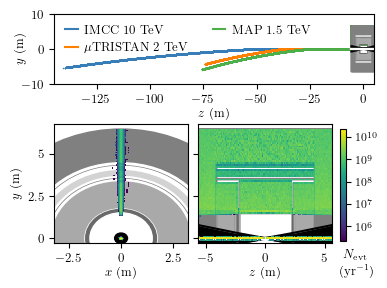

In [71]:
# from mpl_toolkits.axes_grid1 import make_axes_locatable
# fig, axs = plt.subplots(2, 2, figsize = (4.0, 3.8))
fig = plt.figure(figsize=(4.0, 2.8))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 2], width_ratios=[1, 1])
CMAP = 'viridis'

ax1 = plt.subplot(gs[0,:])
ax2 = plt.subplot(gs[1,0])
ax3 = plt.subplot(gs[1,1])


nmax=5000
ax1.scatter((sd2.sims[0]).intersection_points[:,:,2][:nmax], (sd2.sims[0]).intersection_points[:,:,1][:nmax], s = 5, marker='.', linewidth=0, c = pt.cblind_safe_wheel[0], rasterized=True)
ax1.scatter((sd1.sims[0]).intersection_points[:,:,2][:nmax], (sd1.sims[0]).intersection_points[:,:,1][:nmax], s = 5, marker='.',  linewidth=0, c = pt.cblind_safe_wheel[1], rasterized=True)
ax1.scatter((sd.sims[0]).intersection_points[:,:,2][:nmax], (sd.sims[0]).intersection_points[:,:,1][:nmax], s = 5, marker='.', linewidth=0, c = pt.cblind_safe_wheel[2], rasterized=True)
ax1.plot([], [], color = pt.cblind_safe_wheel[0], label = r'IMCC 10 TeV')
ax1.plot([], [], color = pt.cblind_safe_wheel[1], label = r'$\mu$TRISTAN 2 TeV')
ax1.plot([], [], color = pt.cblind_safe_wheel[2], label = r'MAP 1.5 TeV')
dg.plot_det('det_v2', ax = ax1)
ax1.set_ylim(-1000, 1000)
ax1.set_xlim(-14500, 500)
ax1.legend(fontsize=9, loc='upper left', handlelength=1, handletextpad=0.5, markerscale=0.1, ncol=2)


# units = 1e2 #cm
collider = mucol
hist1 = collider.plot(cmap =CMAP, orientation = 'x-y', fs = None, ax = ax2, colorbar = 0, h = True, cmin = 1, title = False, nbins=200)
hist2 = collider.plot(cmap =CMAP, orientation = 'z-y', fs = None, ax = ax3, colorbar = 0, h = True, title = 0, cmin = 1, nbins=120)

ax1.set_ylabel(r'$y$ (m)', labelpad=-3, fontsize=9)
ax2.set_ylabel(r'$y$ (m)', labelpad=4, fontsize=9)
ax3.set_ylabel(r'$y$ (m)', labelpad=4, fontsize=9)

ax1.set_xlabel(r'$z$ (m)', labelpad=2, fontsize=9)
ax2.set_xlabel(r'$x$ (m)', labelpad=1, fontsize=9)
ax3.set_xlabel(r'$z$ (m)', labelpad=1, fontsize=9)

ax3.set_ylabel(r'', labelpad=-1.5, fontsize=9)


ax2.set_ylim(-30,collider.rmax*1.05)
ax3.set_ylim(-30,collider.rmax*1.05)
ax2.set_xlim(-collider.rmax/2,collider.rmax/2)
ax3.set_xlim(-collider.zending,collider.zending)

for ax in [ax1, ax2, ax3]:
    # ax.set_xticks(ax.get_xticks(), fontsize)
    # ax.set_yticks(ax.get_yticks(), fontsize)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=9)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=9)
    
    ticks_x = ticker.FuncFormatter(lambda x, pos: r'${0:g}$'.format(x/100))
    ax.xaxis.set_major_formatter(ticks_x)
    ticks_y = ticker.FuncFormatter(lambda y, pos: r'${0:g}$'.format(y/100))
    ax.yaxis.set_major_formatter(ticks_y)    
ax3.set_yticklabels([])

# ax2.text(-2.8e2, 5e2, r'$z=0$')
# ax3.text(-500, 500, r'$x=0$')

# Add a colorbar that spans both subplots

fig.subplots_adjust(hspace=0.4, wspace=0.075, right=0.82)
# axs[1,1].set_title(r'$\nu$ interaction density map in IMCC MCD design')
cbar_ax = fig.add_subplot(111)  # Create a new subplot for the colorbar
cbar = fig.colorbar(hist1[3], ax=[ax2, ax3], cax=cbar_ax)  # Create the colorbar
# cbar.set_label(r'$N_{\rm events}$ (/ yr)')
cbar_ax.set_position([0.84, 0.12, 0.015, 0.4])  # [left, bottom, width, height]
cbar_ax.set_yticks([1e6, 1e7, 1e8, 1e9, 1e10])
cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), fontsize=8)
cbar_ax.text(0, 4e4, r'\noindent \,\,$N_{\rm evt}$\\(yr$^{-1}$)', fontsize=9)

ax1.set_position([0.125, 0.68, 0.8, 0.25])
plt.savefig('plots/paper_plots/geometry.pdf', dpi = 500, bbox_inches = 'tight')

Text(0.5, 1.0, 'Position of $\\mu$ decay for interacting neutrinos')

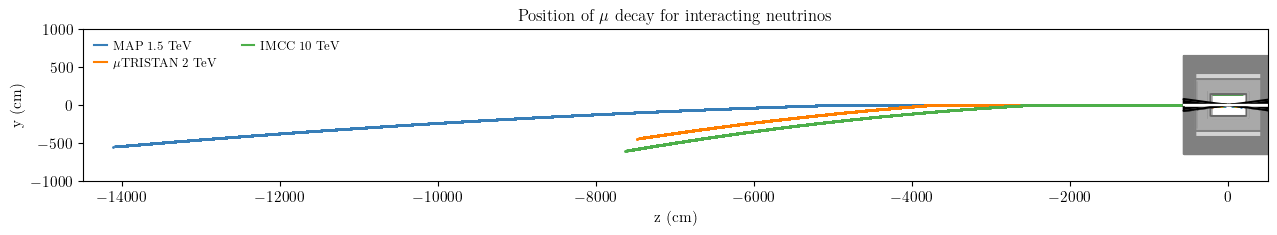

In [773]:
fig, ax = pt.std_fig(figsize=(15,2))
ax.scatter((sd2.sims[0]).intersection_points[:,:,2], (sd2.sims[0]).intersection_points[:,:,1], s = 1, color = pt.cblind_safe_wheel[0])
ax.scatter((sd1.sims[0]).intersection_points[:,:,2], (sd1.sims[0]).intersection_points[:,:,1], s = 1,  color = pt.cblind_safe_wheel[1])
ax.scatter((sd.sims[0]).intersection_points[:,:,2], (sd.sims[0]).intersection_points[:,:,1], s = 1, color = pt.cblind_safe_wheel[2])
ax.plot([], [], color = pt.cblind_safe_wheel[0], label = r'MAP 1.5 TeV')
ax.plot([], [], color = pt.cblind_safe_wheel[1], label = r'$\mu$TRISTAN 2 TeV')
ax.plot([], [], color = pt.cblind_safe_wheel[2], label = r'IMCC 10 TeV')
dg.plot_det('det_v2', ax = ax)
ax.set_ylim(-1000,1000)
ax.set_xlim(-14500, 500)
ax.set_xlabel('z (cm)')
ax.set_ylabel('y (cm)')
ax.legend(fontsize=9, loc='upper left', handlelength=1, handletextpad=0.5, markerscale=0.1, ncol=2)
ax.set_title(r'Position of $\mu$ decay for interacting neutrinos')
# plt.savefig('plots_Luc/posterplots/mu_p.jpg', bbox_inches = 'tight', dpi = 500)

In [862]:
import scipy.stats as st

def get_kde(x, y, w):
    xmin, xmax = x.min(), x.max()
    ymin, ymax = y.min(), y.max()

    # Peform the kernel density estimate
    xx, yy = np.mgrid[xmin:xmax:400j, ymin:ymax:400j]
    positions = np.vstack([xx.ravel(), yy.ravel()])
    values = np.vstack([x, y])
    kernel = st.gaussian_kde(values, weights=w)
    return xx, yy, np.reshape(kernel(positions).T, xx.shape)

In [863]:
XX, YY, ZZ = get_kde(x, y, w)

(-10.0, 10.0)

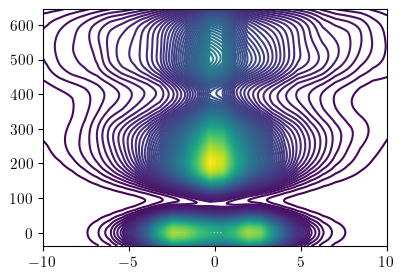

In [869]:
plt.contour(XX, YY, ZZ, levels=100)
plt.xlim(-10, 10)

In [281]:
from DarkNews import const
1/1e4*const.invGeV2_to_cm2

3.893793721116296e-32

In [122]:
from scipy.optimize import curve_fit
def gaussian(x, mu, sigma, A):
    return A * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

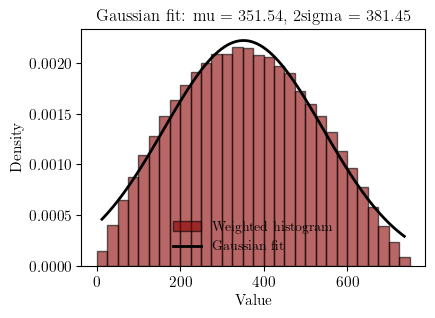

In [124]:
data = np.array(E_mokhov)
weights = np.array(w_mokhov)

hist, bin_edges = np.histogram(data, bins=30, weights=weights, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

initial_guess = [np.mean(data), np.std(data), max(hist)]

params, params_covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)
mu, sigma, A = params

plt.hist(data, bins=30, weights=weights, density=True, alpha=0.6, color='darkred', edgecolor='black', label='Weighted histogram')

x = np.linspace(min(bin_centers), max(bin_centers), 100)
p = gaussian(x, mu, sigma, A)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian fit')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Gaussian fit: mu = {mu:.2f}, 2sigma = {2*sigma:.2f}')
plt.legend()

plt.show()


351.5370793110643 190.7226917976184


(10, 100000)

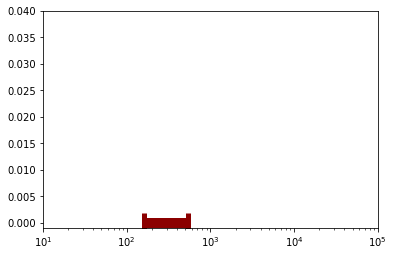

In [67]:
print(mu, sigma)
plt.errorbar([mu], [0], xerr = [sigma], fmt='o', capsize = 10, capthick = 5, markersize = 4, color = 'darkred', linewidth = 10)
plt.xscale('log')
plt.scatter([0], [0.04])
plt.ylim(-0.001, 0.04)
plt.xlim(10, 100000)

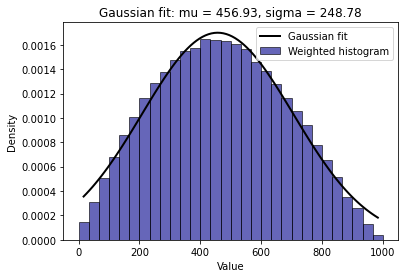

In [68]:
data = np.array(E_muTs)
weights = np.array(w_muTs)

hist, bin_edges = np.histogram(data, bins=30, weights=weights, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

initial_guess = [np.mean(data), np.std(data), max(hist)]

params, params_covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)
mu, sigma, A = params

plt.hist(data, bins=30, weights=weights, density=True, alpha=0.6, color='darkblue', edgecolor='black', label='Weighted histogram')

x = np.linspace(min(bin_centers), max(bin_centers), 100)
p = gaussian(x, mu, sigma, A)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian fit')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Gaussian fit: mu = {mu:.2f}, sigma = {sigma:.2f}')
plt.legend()

plt.show()


456.9308765237521 248.78380552194864


(10, 100000)

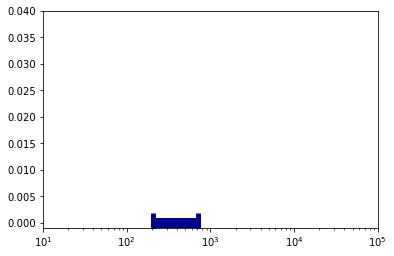

In [70]:
print(mu, sigma)
plt.errorbar([mu], [0], xerr = [sigma], fmt='o', capsize = 10, capthick = 5, markersize = 4, color = 'darkblue', linewidth = 10)
plt.xscale('log')
plt.scatter([0], [0.04])
plt.ylim(-0.001, 0.04)
plt.xlim(10, 100000)

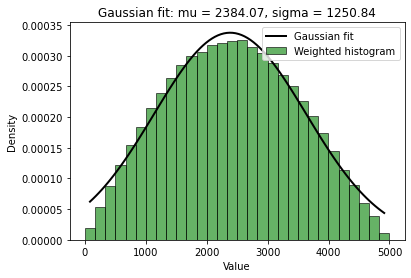

In [71]:
data = np.array(E_mucol)
weights = np.array(w_mucol)

hist, bin_edges = np.histogram(data, bins=30, weights=weights, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

initial_guess = [np.mean(data), np.std(data), max(hist)]

params, params_covariance = curve_fit(gaussian, bin_centers, hist, p0=initial_guess)
mu, sigma, A = params

plt.hist(data, bins=30, weights=weights, density=True, alpha=0.6, color='green', edgecolor='black', label='Weighted histogram')

x = np.linspace(min(bin_centers), max(bin_centers), 100)
p = gaussian(x, mu, sigma, A)
plt.plot(x, p, 'k', linewidth=2, label='Gaussian fit')

plt.xlabel('Value')
plt.ylabel('Density')
plt.title(f'Gaussian fit: mu = {mu:.2f}, sigma = {sigma:.2f}')
plt.legend()

plt.show()


2384.0726979412093 1250.8387409969005


(10, 100000)

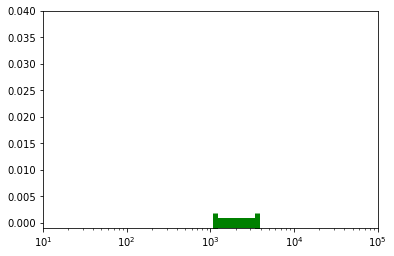

In [72]:
print(mu, sigma)
plt.errorbar([mu], [0], xerr = [sigma], fmt='o', capsize = 10, capthick = 5, markersize = 4, color = 'green', linewidth = 10)
plt.xscale('log')
plt.scatter([0], [0.04])
plt.ylim(-0.001, 0.04)
plt.xlim(10, 100000)